In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.set_option('display.max_rows', 20)
sns.set(font='Malgun Gothic')
%matplotlib inline

In [6]:
df_raw = pd.read_csv('./data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20200918164054.csv', encoding='cp949')

In [8]:
df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2020 1/4', '2020 2/4 p)'], dtype='object')

In [22]:
df = df_raw.melt(['국가(대륙)별', '상품군별', '판매유형별'], var_name='기간', value_name='백만원')

In [23]:
df

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2020 1/4,1525487
1,합계,합계,면세점,2020 1/4,1297490
2,합계,합계,면세점 이외,2020 1/4,227997
3,합계,컴퓨터 및 주변기기,계,2020 1/4,4142
4,합계,컴퓨터 및 주변기기,면세점,2020 1/4,113
...,...,...,...,...,...
895,기타,생활용품 및 자동차용품,면세점,2020 2/4 p),0
896,기타,생활용품 및 자동차용품,면세점 이외,2020 2/4 p),334
897,기타,기 타,계,2020 2/4 p),710
898,기타,기 타,면세점,2020 2/4 p),0


In [24]:
df['연도'] = df['기간'].map(lambda x: x.split()[0])

In [26]:
df['쿼터'] = df['기간'].map(lambda x: x.split()[1].split('/')[0])

In [27]:
df

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,쿼터
0,합계,합계,계,2020 1/4,1525487,2020,1
1,합계,합계,면세점,2020 1/4,1297490,2020,1
2,합계,합계,면세점 이외,2020 1/4,227997,2020,1
3,합계,컴퓨터 및 주변기기,계,2020 1/4,4142,2020,1
4,합계,컴퓨터 및 주변기기,면세점,2020 1/4,113,2020,1
...,...,...,...,...,...,...,...
895,기타,생활용품 및 자동차용품,면세점,2020 2/4 p),0,2020,2
896,기타,생활용품 및 자동차용품,면세점 이외,2020 2/4 p),334,2020,2
897,기타,기 타,계,2020 2/4 p),710,2020,2
898,기타,기 타,면세점,2020 2/4 p),0,2020,2


In [37]:
df_cosmetic = df[df['상품군별'].isin(['화장품']) & df['판매유형별'].isin(['계']) & ~df['국가(대륙)별'].isin(['합계', '중국'])]

In [38]:
df_cosmetic

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,쿼터
72,미국,화장품,계,2020 1/4,12402,2020,1
162,일본,화장품,계,2020 1/4,6811,2020,1
207,아세안(ASEAN),화장품,계,2020 1/4,25755,2020,1
252,EU,화장품,계,2020 1/4,3108,2020,1
297,중동,화장품,계,2020 1/4,671,2020,1
342,중남미,화장품,계,2020 1/4,414,2020,1
387,대양주,화장품,계,2020 1/4,717,2020,1
432,기타,화장품,계,2020 1/4,24692,2020,1
522,미국,화장품,계,2020 2/4 p),11445,2020,2
612,일본,화장품,계,2020 2/4 p),8748,2020,2


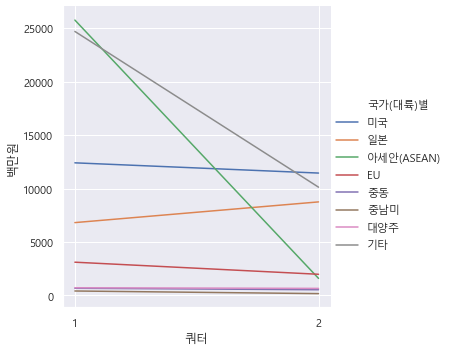

In [39]:
sns.relplot(data=df_cosmetic, x='쿼터', y='백만원', hue='국가(대륙)별', kind='line')